In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
sns.set_style("whitegrid")

## LOADING DATA

In [35]:
df=pd.read_csv('Bengaluru_Ola_Booking.csv')
df

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for Cancelling by Customer,Cancelled Rides by Driver,Reason for Cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Payment Method,Ride Distance,Driver Ratings,Customer Rating
0,2024-01-28,6:00:00,CNR1721175,Success,329258,Auto,Area-3,Area-2,5.42,18.46,...,NaN,0,NaN,0,NaN,868.06,Wallet,28.50,4.4,4.4
1,2024-01-26,3:00:00,CNR2871422,Cancelled by Driver,201414,Mini,Area-7,Area-6,NaN,NaN,...,NaN,1,The customer was coughing/sick,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-01-15,16:00:00,CNR6875935,Cancelled by Driver,301629,Bike,Area-40,Area-24,NaN,NaN,...,NaN,1,Personal & Car related issues,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-01-02,22:00:00,CNR6798834,Cancelled by Driver,319684,Prime Sedan,Area-11,Area-24,NaN,NaN,...,NaN,1,The customer was coughing/sick,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-01-30,22:00:00,CNR9661713,Incomplete,330283,Bike,Area-41,Area-45,NaN,NaN,...,NaN,0,NaN,1,Other Issue,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2024-01-27,2:00:00,CNR0378586,Success,349873,Auto,Area-17,Area-21,5.56,9.05,...,NaN,0,NaN,0,NaN,1369.51,UPI,11.04,5.0,4.3
49996,2024-01-17,23:00:00,CNR2461856,Cancelled by Driver,880053,Auto,Area-37,Area-43,NaN,NaN,...,NaN,1,More than permitted people in there,0,NaN,NaN,NaN,NaN,NaN,NaN
49997,2024-01-18,22:00:00,CNR9524579,Success,752806,eBike,Area-48,Area-29,5.15,13.72,...,NaN,0,NaN,0,NaN,1930.49,UPI,14.49,3.1,4.5
49998,2024-01-28,14:00:00,CNR3698787,Success,159552,Bike,Area-1,Area-37,14.89,28.07,...,NaN,0,NaN,0,NaN,1534.66,Cash,4.60,3.3,4.1


## DATA CLEANING

In [36]:
#converting date and time into a single dayetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

In [37]:
# Replace missing values
df.loc[:, 'Avg VTAT'] = df['Avg VTAT'].fillna(df['Avg VTAT'].median())
df.loc[:, 'Avg CTAT'] = df['Avg CTAT'].fillna(df['Avg CTAT'].median())
df.loc[:, 'Booking Value'] = df['Booking Value'].fillna(df['Booking Value'].median())
df.loc[:, 'Ride Distance'] = df['Ride Distance'].fillna(df['Ride Distance'].median())
df.loc[:, 'Driver Ratings'] = df['Driver Ratings'].fillna(df['Driver Ratings'].median())
df.loc[:, 'Customer Rating'] = df['Customer Rating'].fillna(df['Customer Rating'].median())


In [38]:
# Replace NaN in categorical columns
cat_cols = ['Reason for Cancelling by Customer', 'Reason for Cancelling by Driver', 'Incomplete Rides Reason', 'Payment Method']
df.loc[:, cat_cols] = df[cat_cols].fillna("No Reason Given")

In [39]:
df

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Cancelled Rides by Driver,Reason for Cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Payment Method,Ride Distance,Driver Ratings,Customer Rating,Datetime
0,2024-01-28,6:00:00,CNR1721175,Success,329258,Auto,Area-3,Area-2,5.42,18.46,...,0,No Reason Given,0,No Reason Given,868.06,Wallet,28.50,4.4,4.4,2024-01-28 06:00:00
1,2024-01-26,3:00:00,CNR2871422,Cancelled by Driver,201414,Mini,Area-7,Area-6,10.46,15.61,...,1,The customer was coughing/sick,0,No Reason Given,1023.35,No Reason Given,25.46,4.0,4.0,2024-01-26 03:00:00
2,2024-01-15,16:00:00,CNR6875935,Cancelled by Driver,301629,Bike,Area-40,Area-24,10.46,15.61,...,1,Personal & Car related issues,0,No Reason Given,1023.35,No Reason Given,25.46,4.0,4.0,2024-01-15 16:00:00
3,2024-01-02,22:00:00,CNR6798834,Cancelled by Driver,319684,Prime Sedan,Area-11,Area-24,10.46,15.61,...,1,The customer was coughing/sick,0,No Reason Given,1023.35,No Reason Given,25.46,4.0,4.0,2024-01-02 22:00:00
4,2024-01-30,22:00:00,CNR9661713,Incomplete,330283,Bike,Area-41,Area-45,10.46,15.61,...,0,No Reason Given,1,Other Issue,1023.35,No Reason Given,25.46,4.0,4.0,2024-01-30 22:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2024-01-27,2:00:00,CNR0378586,Success,349873,Auto,Area-17,Area-21,5.56,9.05,...,0,No Reason Given,0,No Reason Given,1369.51,UPI,11.04,5.0,4.3,2024-01-27 02:00:00
49996,2024-01-17,23:00:00,CNR2461856,Cancelled by Driver,880053,Auto,Area-37,Area-43,10.46,15.61,...,1,More than permitted people in there,0,No Reason Given,1023.35,No Reason Given,25.46,4.0,4.0,2024-01-17 23:00:00
49997,2024-01-18,22:00:00,CNR9524579,Success,752806,eBike,Area-48,Area-29,5.15,13.72,...,0,No Reason Given,0,No Reason Given,1930.49,UPI,14.49,3.1,4.5,2024-01-18 22:00:00
49998,2024-01-28,14:00:00,CNR3698787,Success,159552,Bike,Area-1,Area-37,14.89,28.07,...,0,No Reason Given,0,No Reason Given,1534.66,Cash,4.60,3.3,4.1,2024-01-28 14:00:00


In [40]:
# drop the datetime column
df.drop(columns=['Date', 'Time'], inplace=True)

In [41]:
df['Hour'] = df['Datetime'].dt.hour
df['Day'] = df['Datetime'].dt.day
df['Day of Week'] = df['Datetime'].dt.day_name()
df['Month'] = df['Datetime'].dt.month_name()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Booking ID                         50000 non-null  object        
 1   Booking Status                     50000 non-null  object        
 2   Customer ID                        50000 non-null  int64         
 3   Vehicle Type                       50000 non-null  object        
 4   Pickup Location                    50000 non-null  object        
 5   Drop Location                      50000 non-null  object        
 6   Avg VTAT                           50000 non-null  float64       
 7   Avg CTAT                           50000 non-null  float64       
 8   Cancelled Rides by Customer        50000 non-null  int64         
 9   Reason for Cancelling by Customer  50000 non-null  object        
 10  Cancelled Rides by Driver         

In [43]:
df

,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for Cancelling by Customer,...,Booking Value,Payment Method,Ride Distance,Driver Ratings,Customer Rating,Datetime,Hour,Day,Day of Week,Month
0,CNR1721175,Success,329258,Auto,Area-3,Area-2,5.42,18.46,0,No Reason Given,...,868.06,Wallet,28.50,4.4,4.4,2024-01-28 06:00:00,6,28,Sunday,January
1,CNR2871422,Cancelled by Driver,201414,Mini,Area-7,Area-6,10.46,15.61,0,No Reason Given,...,1023.35,No Reason Given,25.46,4.0,4.0,2024-01-26 03:00:00,3,26,Friday,January
2,CNR6875935,Cancelled by Driver,301629,Bike,Area-40,Area-24,10.46,15.61,0,No Reason Given,...,1023.35,No Reason Given,25.46,4.0,4.0,2024-01-15 16:00:00,16,15,Monday,January
3,CNR6798834,Cancelled by Driver,319684,Prime Sedan,Area-11,Area-24,10.46,15.61,0,No Reason Given,...,1023.35,No Reason Given,25.46,4.0,4.0,2024-01-02 22:00:00,22,2,Tuesday,January
4,CNR9661713,Incomplete,330283,Bike,Area-41,Area-45,10.46,15.61,0,No Reason Given,...,1023.35,No Reason Given,25.46,4.0,4.0,2024-01-30 22:00:00,22,30,Tuesday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,CNR0378586,Success,349873,Auto,Area-17,Area-21,5.56,9.05,0,No Reason Given,...,1369.51,UPI,11.04,5.0,4.3,2024-01-27 02:00:00,2,27,Saturday,January
49996,CNR2461856,Cancelled by Driver,880053,Auto,Area-37,Area-43,10.46,15.61,0,No Reason Given,...,1023.35,No Reason Given,25.46,4.0,4.0,2024-01-17 23:00:00,23,17,Wednesday,January
49997,CNR9524579,Success,752806,eBike,Area-48,Area-29,5.15,13.72,0,No Reason Given,...,1930.49,UPI,14.49,3.1,4.5,2024-01-18 22:00:00,22,18,Thursday,January
49998,CNR3698787,Success,159552,Bike,Area-1,Area-37,14.89,28.07,0,No Reason Given,...,1534.66,Cash,4.60,3.3,4.1,2024-01-28 14:00:00,14,28,Sunday,January


##  EXPLORATORY DATA ANLYSIS
### 1. Booking Trends Over Time

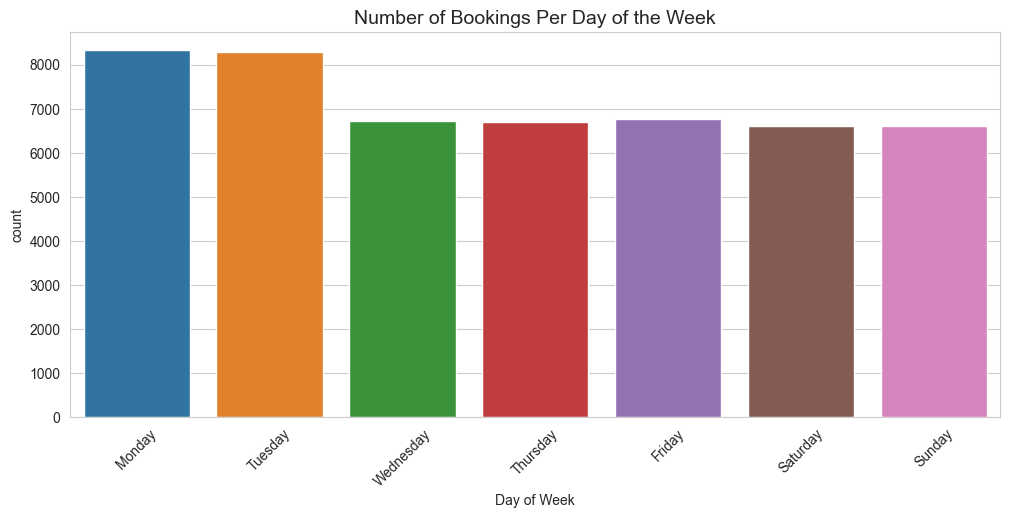

In [44]:
plt.figure(figsize=(12, 5))

custom_colours={'Monday':'#1f77b4','Tuesday':'#ff7f0e','Wednesday':'#2ca02c','Thursday':'#d62728','Friday':'#9467bd','Saturday':'#8c564b','Sunday':'#e377c2'}

sns.countplot(data=df,x='Day of Week', hue='Day of Week',legend=False, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],palette=custom_colours)
plt.title("Number of Bookings Per Day of the Week", fontsize=14)
plt.xticks(rotation=45)

plt.show()

### 2. Hourly Booking Patterns

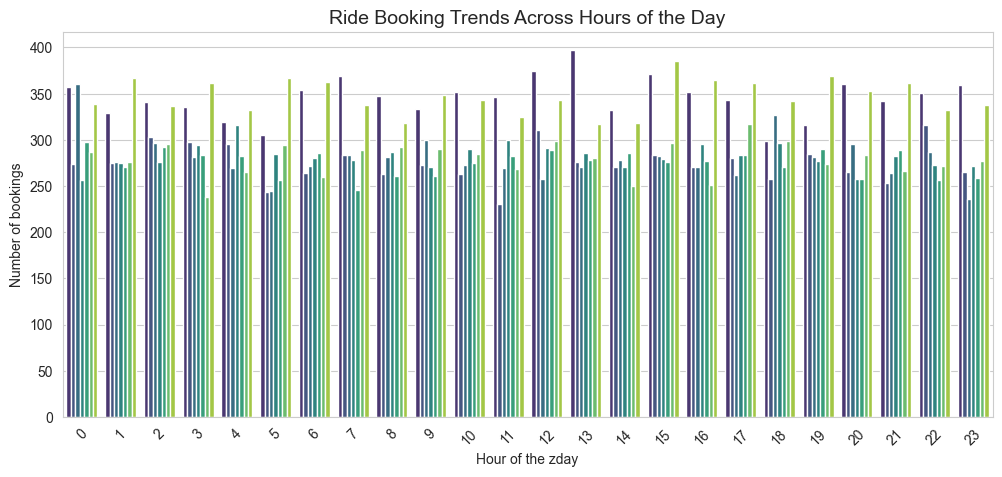

In [45]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Hour',hue='Day of Week',legend=False, palette='viridis')
plt.title("Ride Booking Trends Across Hours of the Day", fontsize=14)
plt.xlabel("Hour of the zday")
plt.ylabel("Number of bookings")
plt.xticks(rotation=45)

plt.show()

## 3. Cancellation Analysis 

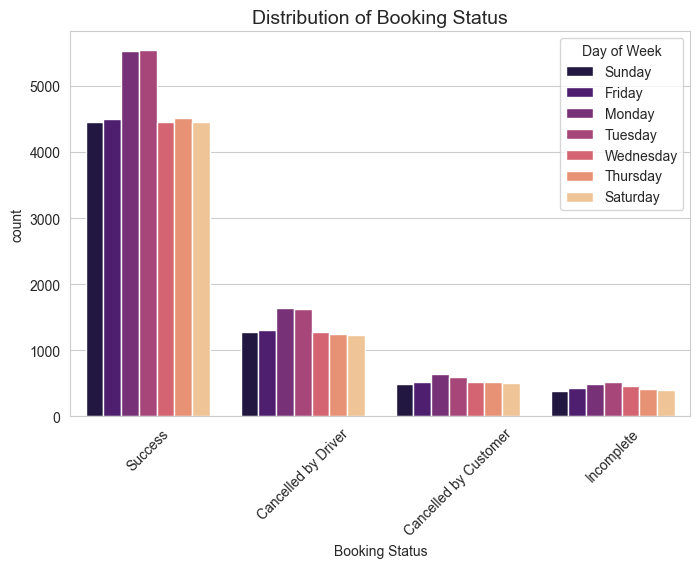

In [46]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Booking Status',hue='Day of Week', order=df['Booking Status'].value_counts().index, palette='magma')
plt.title("Distribution of Booking Status", fontsize=14)
plt.xticks(rotation=45)
plt.show()

## 4. Top Vehicle Types Used

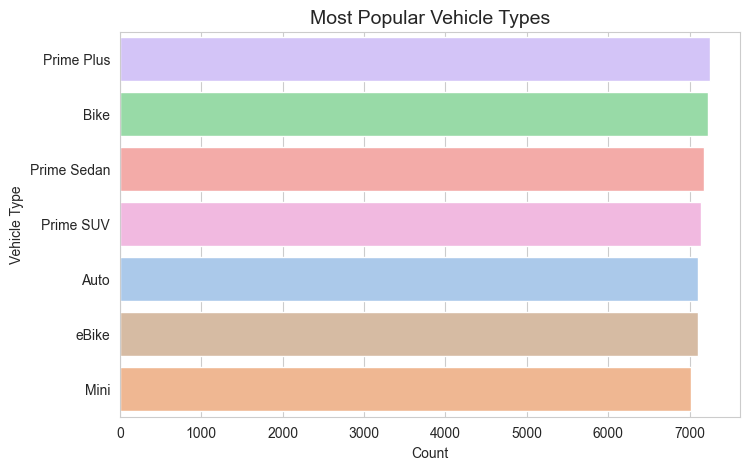

In [47]:
plt.figure(figsize=(8, 5))

sns.countplot(data=df, y='Vehicle Type',hue='Vehicle Type', order=df['Vehicle Type'].value_counts().index, palette='pastel')
plt.title("Most Popular Vehicle Types", fontsize=14)
plt.xlabel('Count')
plt.ylabel('Vehicle Type')

plt.show()

## 5. Average Ratings Distribution

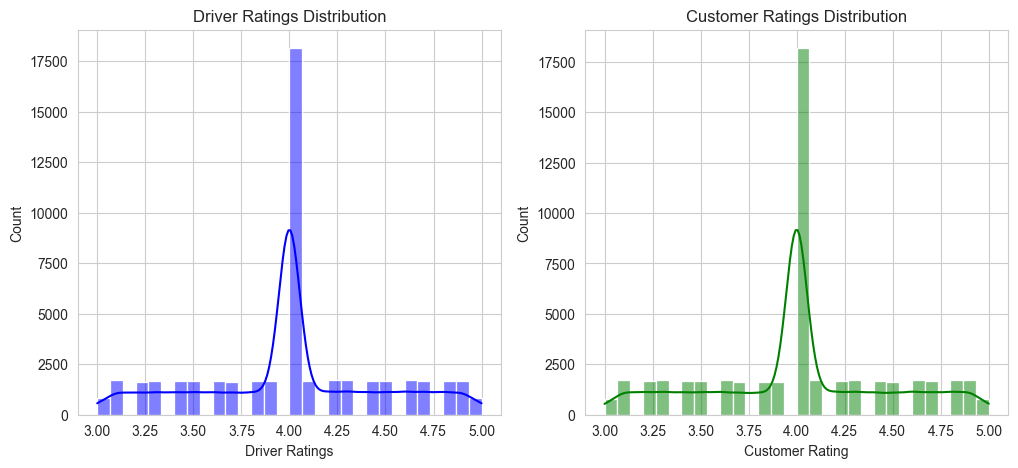

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['Driver Ratings'], bins=30, kde=True, color='blue', ax=axes[0])
axes[0].set_title("Driver Ratings Distribution")

sns.histplot(df['Customer Rating'], bins=30, kde=True, color='green', ax=axes[1])
axes[1].set_title("Customer Ratings Distribution")

plt.show()

## 6. Payment Method Preferance For Weekly

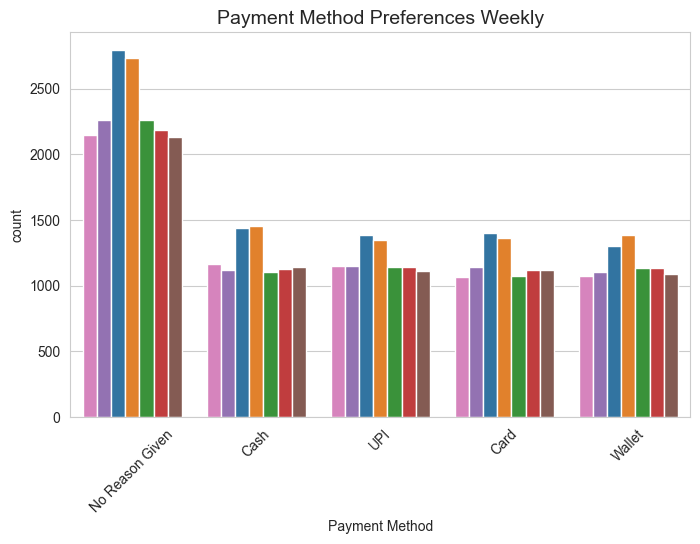

In [49]:
plt.figure(figsize=(8, 5))

custom_colours={'Monday':'#1f77b4','Tuesday':'#ff7f0e','Wednesday':'#2ca02c','Thursday':'#d62728','Friday':'#9467bd','Saturday':'#8c564b','Sunday':'#e377c2'}

sns.countplot(data=df, x='Payment Method',hue="Day of Week",legend=False, order=df['Payment Method'].value_counts().index, palette=custom_colours)
plt.title("Payment Method Preferences Weekly", fontsize=14)
plt.xticks(rotation=45)

plt.show()

## 7. Ride Distance vs. Booking Value

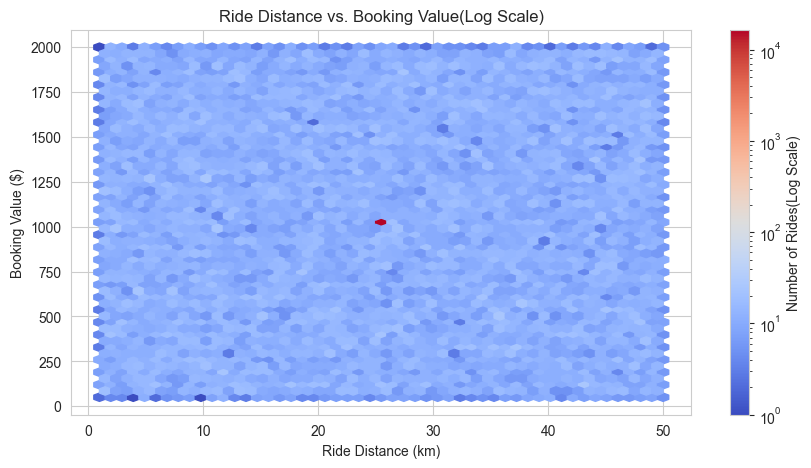

In [50]:
plt.figure(figsize=(10, 5))

plt.hexbin(df['Ride Distance'], df['Booking Value'], gridsize=50, cmap='coolwarm', mincnt=1, norm='log')
plt.colorbar(label="Number of Rides(Log Scale)")
plt.title("Ride Distance vs. Booking Value(Log Scale)")
plt.xlabel("Ride Distance (km)")
plt.ylabel("Booking Value ($)")

plt.show()

## 8. Correlation Heatmap

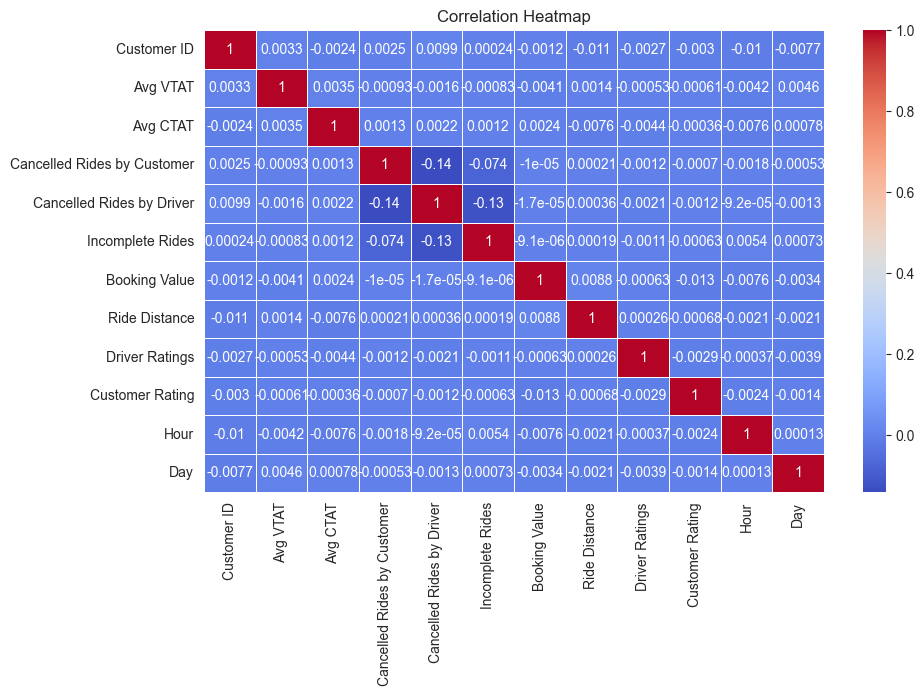

In [51]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## 9. Payment Distribution

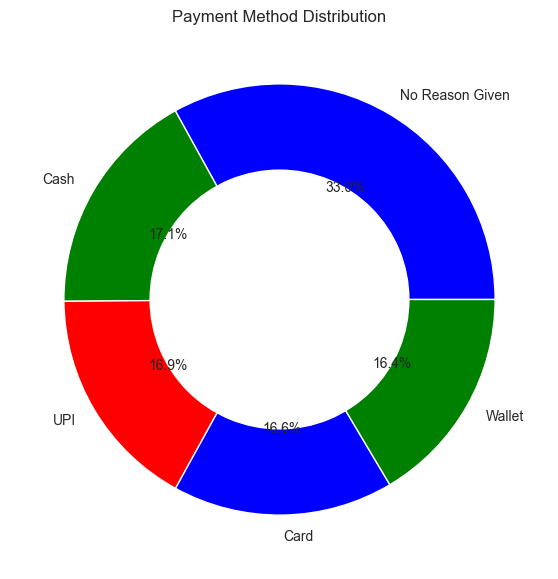

In [53]:
plt.figure(figsize=(7, 7))

payment_counts = df['Payment Method'].value_counts()
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', colors=['blue', 'green', 'red'],
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, radius=1)
plt.pie([1], colors=['white'], radius=0.6)
plt.title("Payment Method Distribution")

plt.show()